# Introduction to regression methods

## Dataset:

$D={((\mathbf x_{1}, y_{1}), ..., (\mathbf x_{N}, y_{N}))}$,

where $y_{i}\epsilon \mathbb{R}$

![Simple linear regression](resources/simple_regression.png)

### Univariate linear regression
$\hat{y} = b+w_{1}x$

$y$: predicted value

$x$: independent feature of training data

$b$: bias value(trainable)

$w_{1}$: weight value for feature x(trainable)

### Load the data

In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [28]:
# Generate a dataset

np.random.seed(0)

X = 2.5 * np.random.rand(100) + 1.5   
Y = 0.3 * X 

model = {'weight': 0.3,
         'bias': 2}

res = 1 * np.random.randn(100)      
Y_observed = 0.3 * X + res 

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'experience': X,
     'income[thous.]': Y_observed}
)

# Show the first five rows of our dataframe
df.head()

,experience,income[thous.]
0,2.872034,-0.303540
1,3.287973,1.887219
2,3.006908,1.367735
3,2.862208,-0.677581
4,2.559137,2.255993


### Plot the data
#### Underlying true data distribution

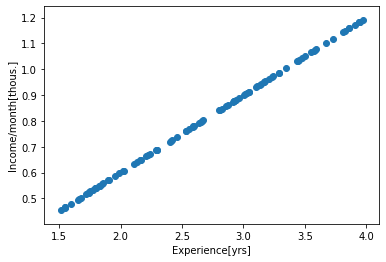

In [29]:
fig = plt.figure()
plt.scatter(X, Y)
plt.xlabel('Experience[yrs]')
plt.ylabel('Income/month[thous.]')
plt.show()

#### Observed, noisy real world data

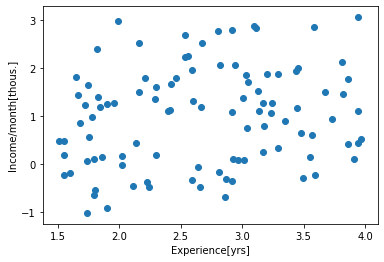

In [30]:
fig = plt.figure()
plt.scatter(X, Y_observed)
plt.xlabel('Experience[yrs]')
plt.ylabel('Income/month[thous.]')
plt.show()

## Does interpolation solve the problem ?

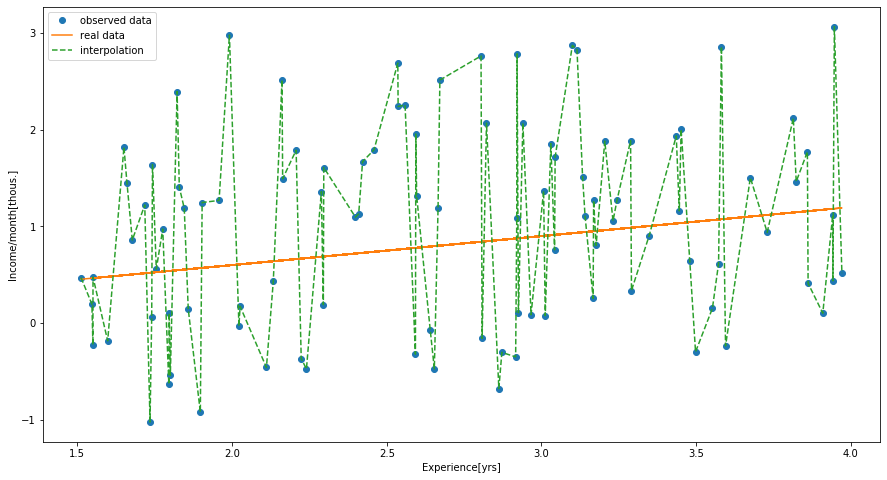

In [31]:
from scipy.interpolate import interp1d

f = interp1d(X[np.argsort(X)], Y_observed[np.argsort(X)], kind='cubic')

fig = plt.figure(figsize=(15,8))
plt.plot(X, Y_observed,'o', X, Y, X[np.argsort(X)], f(X[np.argsort(X)]), '--')

plt.xlabel('Experience[yrs]')
plt.ylabel('Income/month[thous.]')
plt.legend(['observed data', 'real data', 'interpolation'])

plt.show()

## Assuming we know the true distribution function(model), whats the error wrt. the observed points ?

### Residuals
Deviations of observations wrt. true model line:

$res = \hat{y}-y$

In [32]:
def residuals(X, model, Y_observed):
    return model['weight'] * X - Y_observed

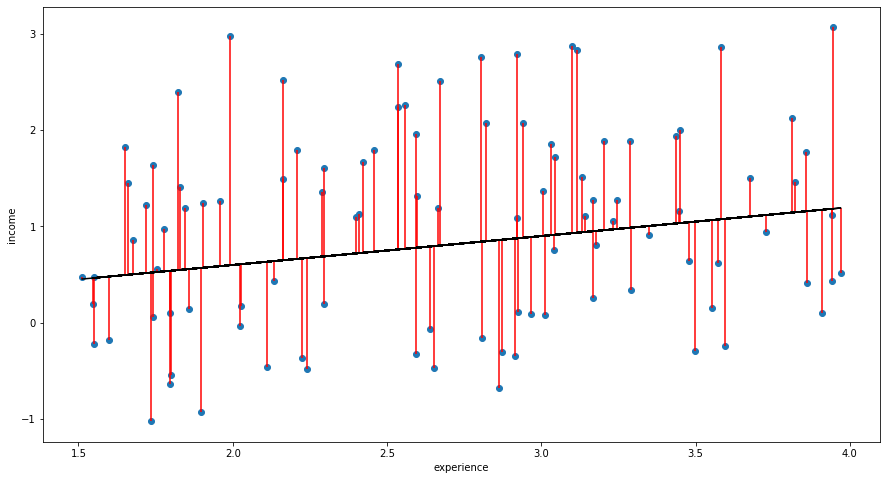

In [33]:
fig = plt.figure(figsize=(15,8))

plt.scatter(X, Y_observed)
plt.plot(X, Y, 'k')
plt.vlines(X, Y_observed, Y_observed+residuals(X, model, Y_observed), 'r')
plt.xlabel('experience')
plt.ylabel('income')

plt.show()

### Mean-squared error as loss function
$MSE_{scalar} = \frac{1}{2n} \sum_{n=1}^{Rows} ( \hat{y} - y )^{2} $

$MSE_{matrix} = \frac{1}{2} \lVert \hat{Y} - Y \lVert^{2} $

In [34]:
from sklearn.metrics import mean_squared_error

## Digging into optimization theory
Let:

$MSE = \underset{w_{1}}{min} \ \frac{1}{2n} \sum_{n=1}^{Rows} ( \hat{y} - y )^{2} $

with: $\hat{y}=w_{1}x$

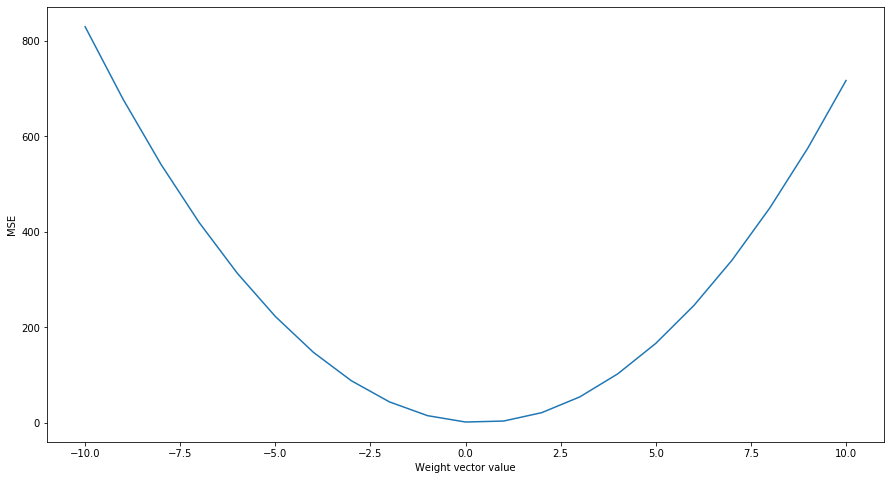

In [35]:
w_s = np.linspace(-10, 10, 21)

mse_losses = []
for w in w_s:
    model = {
        'weight': w
    }
    
    Y_pred = w*X
    mse_losses.append(mean_squared_error(Y_observed, Y_pred))
    
fig = plt.figure(figsize=(15,8))

plt.plot(w_s, mse_losses)
plt.xlabel('Weight vector value')
plt.ylabel('MSE')
plt.show()

# Convex optimization problem -> there exists a global optimum

## Mathematical optimization problem formulation:

$\underset{w_{1}}{min}\ MSE = \underset{w_{1}}{min} \ \frac{1}{2n} \sum_{n=1}^{Rows} ( w_{1}x_{i} - y)^{2} = \underset{w_{1}}{min} \ \frac{1}{2n} \lvert \lvert \mathbf{X}w_{1} - \mathbf{y} \lvert \lvert^{2} $

with:

$\mathbf{X}\epsilon \mathbb{R}^{Nx1}$, N: number of data points

$\mathbf{y}\epsilon \mathbb{R}^{Nx1}$

## 1. Approach: Closed-form solution(not always possible !)

In order to minimize set: $\nabla_{w_{1}} MSE = 0$ and solve for $w_{1}$

$\nabla_{w_{1}} MSE = \lvert \lvert \mathbf{X}w_{1} - \mathbf{y} \lvert \lvert^{2}=0$

$\Rightarrow w_{1}=(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$

In [36]:
w_opt = np.dot(X.T, Y_observed)/(np.dot(X.T,X))
print(f'Optimial weight value: {w_opt}')

Optimial weight value: 0.36518397181749696


### Plotting results

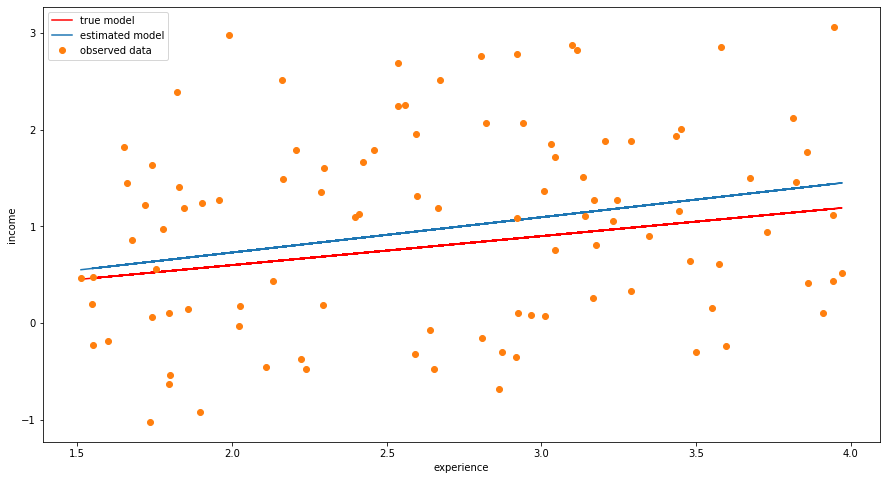

In [37]:
fig = plt.figure(figsize=(15,8))

plt.plot(X, Y,'r', X, w_opt*X, X, Y_observed, 'o')
plt.legend(['true model', 'estimated model', 'observed data'])
plt.xlabel('experience')
plt.ylabel('income')

plt.show()

# 2. Approach: Gradient Descent - Very important optimization algorithm

<img src="resources/negative_gradient.svg"  />
<img src="resources/negative_gradient2.svg"  />

## How it works

1. Randomly initialize $w_{1}$
2. Repeat until convergence: $w^{t+1}_{1} \leftarrow w^{t}_{1} - \alpha \nabla_{w^{t}_{1}}J(w_{1})$, 
where $\alpha$= learning rate and $J(w_{1})=MSE$

## NOTE:
- A gradient is a vector, so it has a direction and magnitude
- $\nabla J$ points in direction of greatest increase
- $-\nabla J$ points in direction of greatest decrease


# NOTE: Usually loss functions are NON-convex, meaning that there doesn't exist a closed form solution

<img src="resources/grad_descent.png"  />

# Jump to practical session